In [1]:
from PyEMD import CEEMDAN
import math
import tensorflow as tf
import numpy
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn import metrics
import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### import the libraries
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from math import sqrt

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [2]:
df = pd.read_csv('C:/Users/irene/Dropbox/! RENEWABLE ENERGY/DATA/final_la_haute_R0711.csv')
df['Date'] = pd.to_datetime(df['Date_time'])
df['Year'] = df['Date'].dt.year 
df['Month'] = df['Date'].dt.month 
new_data=df[['Month','Year','Date','P_avg']]
new_data=new_data[new_data.Year == 2017]

cap=max(new_data['P_avg'])


In [3]:
CUDA_VISIBLE_DEVICES=""

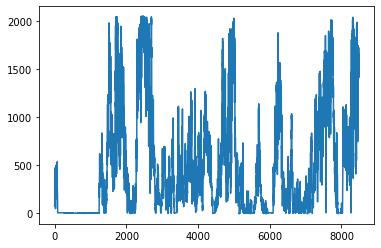

In [4]:
import numpy as np
x=[1,2]
baru=new_data.loc[new_data['Month'].isin(x)]
barus=baru.reset_index(drop=True)
barus1=barus.dropna()
plt.plot(barus1['P_avg'])
    


In [5]:
data_partition=0.5257331291956189
import time

start_time = time.time()

datas=barus1['P_avg']
datas_wind=pd.DataFrame(datas)
dfs=datas
s = dfs.values


In [5]:
##PROP


from PyEMD import EMD,EEMD,CEEMDAN

emd = CEEMDAN(epsilon=0.05)
emd.noise_seed(12345)
IMFs = emd(s)

full_imf=pd.DataFrame(IMFs)
ceemdan1=full_imf.T

times=time.time() - start_time
print("--- %s seconds -" % (times))

#%% Example script
import numpy as np
import matplotlib.pyplot as plt
import ewtpy
    

pred_test=[]
test_ori=[]
pred_train=[]
train_ori=[]

--- 175.72993278503418 seconds -


In [6]:
    
imf1=ceemdan1.iloc[:,0]
imf_dataps=numpy.array(imf1)
imf_datasetss= imf_dataps.reshape(-1,1)
imf_new_datasets=pd.DataFrame(imf_datasetss)


In [7]:
ewt,  mfb ,boundaries = ewtpy.EWT1D(imf1, N =3)
df_ewt=pd.DataFrame(ewt)

df_ewt.drop(df_ewt.columns[2],axis=1,inplace=True)
denoised=df_ewt.sum(axis = 1, skipna = True) 
ceemdan_without_imf1=ceemdan1.iloc[:,1:]
new_ceemdan=pd.concat([denoised,ceemdan_without_imf1],axis=1)    
    

pred_test=[]
test_ori=[]
pred_train=[]
train_ori=[]

look_back=6
epoch=100
batch_size=64
neuron=128
lr=0.001
optimizer='Adam'


0    1.523467
54.197747787603426
31.2414255574514
--- 548.0374608039856 seconds -


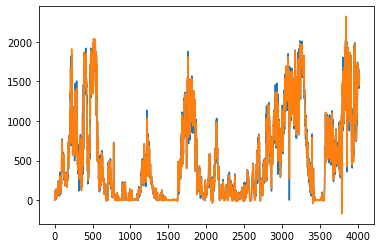

In [8]:
### PROPOSED METHOD
start_time = time.time()


for col in new_ceemdan:

    datasetss2=pd.DataFrame(new_ceemdan[col])
    datasets=datasetss2.values
    train_size = int(len(datasets) * data_partition)
    test_size = len(datasets) - train_size
    train, test = datasets[0:train_size], datasets[train_size:len(datasets)]

    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    X_train=pd.DataFrame(trainX)
    Y_train=pd.DataFrame(trainY)
    X_test=pd.DataFrame(testX)
    Y_test=pd.DataFrame(testY)
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X= sc_X.fit_transform(X_train)
    y= sc_y.fit_transform(Y_train)
    X1= sc_X.fit_transform(X_test)
    y1= sc_y.fit_transform(Y_test)
    y=y.ravel()
    y1=y1.ravel()  

    import numpy

    trainX = numpy.reshape(X, (X.shape[0], X.shape[1],1))
    testX = numpy.reshape(X1, (X1.shape[0], X1.shape[1],1))

    numpy.random.seed(1234)
    import tensorflow as tf
    tf.random.set_seed(1234)

        
    import os 
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
    from keras.models import Sequential
    from keras.layers.core import Dense, Dropout, Activation
    from keras.layers.recurrent import LSTM

    neuron=128
    model = Sequential()
    model.add(LSTM(units = neuron,input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mse',optimizer=optimizer)

    # Fitting the RNN to the Training set
    model.fit(trainX, y, epochs = epoch, batch_size = batch_size,verbose=0)

    # make predictions
    y_pred_train = model.predict(trainX)
    y_pred_test = model.predict(testX)

    # make predictions

    y_pred_test= numpy.array(y_pred_test).ravel()
    y_pred_test=pd.DataFrame(y_pred_test)
    y1=pd.DataFrame(y1)
    y=pd.DataFrame(y)
    y_pred_train= numpy.array(y_pred_train).ravel()
    y_pred_train=pd.DataFrame(y_pred_train)

    y_test= sc_y.inverse_transform (y1)
    y_train= sc_y.inverse_transform (y)

    y_pred_test1= sc_y.inverse_transform (y_pred_test)
    y_pred_train1= sc_y.inverse_transform (y_pred_train)


    pred_test.append(y_pred_test1)
    test_ori.append(y_test)
    pred_train.append(y_pred_train1)
    train_ori.append(y_train)


result_pred_test= pd.DataFrame.from_records(pred_test)
result_pred_train= pd.DataFrame.from_records(pred_train)


a=result_pred_test.sum(axis = 0, skipna = True) 
b=result_pred_train.sum(axis = 0, skipna = True) 

dataframe=pd.DataFrame(dfs)
dataset=dataframe.values

train_size = int(len(dataset) * data_partition)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
X_train=pd.DataFrame(trainX)
Y_train=pd.DataFrame(trainY)
X_test=pd.DataFrame(testX)
Y_test=pd.DataFrame(testY)

sc_X = StandardScaler()
sc_y = StandardScaler() 
X= sc_X.fit_transform(X_train)
y= sc_y.fit_transform(Y_train)
X1= sc_X.fit_transform(X_test)
y1= sc_y.fit_transform(Y_test)
y=y.ravel()
y1=y1.ravel()


trainX = numpy.reshape(X, (X.shape[0], 1, X.shape[1]))
testX = numpy.reshape(X1, (X1.shape[0], 1, X1.shape[1]))

numpy.random.seed(1234)
import tensorflow as tf

y1=pd.DataFrame(y1)
y=pd.DataFrame(y)

y_test= sc_y.inverse_transform (y1)
y_train= sc_y.inverse_transform (y)


a= pd.DataFrame(a)    
y_test= pd.DataFrame(y_test)    

plt.plot(y_test)
plt.plot(a)

#summarize the fit of the model
mape=numpy.mean((numpy.abs(y_test-a))/cap)*100
rmse= sqrt(mean_squared_error(y_test,a))
mae=metrics.mean_absolute_error(y_test,a)
 
print(mape.to_string())
print(rmse)
print(mae)


times=time.time() - start_time
print("--- %s seconds -" % (times))

In [10]:

pred_test=[]
test_ori=[]
pred_train=[]
train_ori=[]

0    1.778186
66.06711443939713
36.464907324218856
--- 776.3094999790192 seconds -


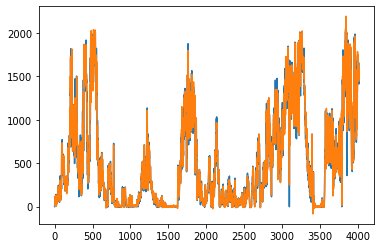

In [11]:
#####CEEMDAN LSTM
start_time = time.time()


for col in ceemdan1:

    datasetss2=pd.DataFrame(ceemdan1[col])
    datasets=datasetss2.values
    train_size = int(len(datasets) * data_partition)
    test_size = len(datasets) - train_size
    train, test = datasets[0:train_size], datasets[train_size:len(datasets)]

    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    X_train=pd.DataFrame(trainX)
    Y_train=pd.DataFrame(trainY)
    X_test=pd.DataFrame(testX)
    Y_test=pd.DataFrame(testY)
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X= sc_X.fit_transform(X_train)
    y= sc_y.fit_transform(Y_train)
    X1= sc_X.fit_transform(X_test)
    y1= sc_y.fit_transform(Y_test)
    y=y.ravel()
    y1=y1.ravel()  

    import numpy

    trainX = numpy.reshape(X, (X.shape[0],X.shape[1],1))
    testX = numpy.reshape(X1, (X1.shape[0],X1.shape[1],1))

    numpy.random.seed(1234)
    import tensorflow as tf
    tf.random.set_seed(1234)

        
    import os 
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
    from keras.models import Sequential
    from keras.layers.core import Dense, Dropout, Activation
    from keras.layers.recurrent import LSTM

    neuron=128
    model = Sequential()
    model.add(LSTM(units = neuron,input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mse',optimizer=optimizer)

    # Fitting the RNN to the Training set
    model.fit(trainX, y, epochs = epoch, batch_size = batch_size,verbose=0)

    # make predictions
    y_pred_train = model.predict(trainX)
    y_pred_test = model.predict(testX)

    # make predictions

    y_pred_test= numpy.array(y_pred_test).ravel()
    y_pred_test=pd.DataFrame(y_pred_test)
    y1=pd.DataFrame(y1)
    y=pd.DataFrame(y)
    y_pred_train= numpy.array(y_pred_train).ravel()
    y_pred_train=pd.DataFrame(y_pred_train)

    y_test= sc_y.inverse_transform (y1)
    y_train= sc_y.inverse_transform (y)

    y_pred_test1= sc_y.inverse_transform (y_pred_test)
    y_pred_train1= sc_y.inverse_transform (y_pred_train)


    pred_test.append(y_pred_test1)
    test_ori.append(y_test)
    pred_train.append(y_pred_train1)
    train_ori.append(y_train)


result_pred_test= pd.DataFrame.from_records(pred_test)
result_pred_train= pd.DataFrame.from_records(pred_train)


a=result_pred_test.sum(axis = 0, skipna = True) 
b=result_pred_train.sum(axis = 0, skipna = True) 

dataframe=pd.DataFrame(dfs)
dataset=dataframe.values

train_size = int(len(dataset) * data_partition)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
X_train=pd.DataFrame(trainX)
Y_train=pd.DataFrame(trainY)
X_test=pd.DataFrame(testX)
Y_test=pd.DataFrame(testY)

sc_X = StandardScaler()
sc_y = StandardScaler() 
X= sc_X.fit_transform(X_train)
y= sc_y.fit_transform(Y_train)
X1= sc_X.fit_transform(X_test)
y1= sc_y.fit_transform(Y_test)
y=y.ravel()
y1=y1.ravel()


trainX = numpy.reshape(X, (X.shape[0], 1, X.shape[1]))
testX = numpy.reshape(X1, (X1.shape[0], 1, X1.shape[1]))

numpy.random.seed(1234)
import tensorflow as tf

y1=pd.DataFrame(y1)
y=pd.DataFrame(y)

y_test= sc_y.inverse_transform (y1)
y_train= sc_y.inverse_transform (y)


a= pd.DataFrame(a)    
y_test= pd.DataFrame(y_test)    

plt.plot(y_test)
plt.plot(a)

#summarize the fit of the model
mape=numpy.mean((numpy.abs(y_test-a))/cap)*100
rmse= sqrt(mean_squared_error(y_test,a))
mae=metrics.mean_absolute_error(y_test,a)
 
print(mape.to_string())
print(rmse)
print(mae)


times=time.time() - start_time
print("--- %s seconds -" % (times))

In [12]:
#####EMD LSTM
import time

start_time = time.time()

datas=barus1['P_avg']
datas_wind=pd.DataFrame(datas)
dfs=datas
s = dfs.values

from PyEMD import EMD,EEMD,CEEMDAN

emd = EMD()
#emd.noise_seed(12345)
IMFs = emd(s)

full_imf=pd.DataFrame(IMFs)
ceemdan1=full_imf.T

times=time.time() - start_time
print("--- %s seconds -" % (times))

#%% Example script
import numpy as np
import matplotlib.pyplot as plt
import ewtpy
    

pred_test=[]
test_ori=[]
pred_train=[]
train_ori=[]

--- 7.240034103393555 seconds -


0    1.94388
67.46651147235622
39.862747462799746
--- 902.7458395957947 seconds -


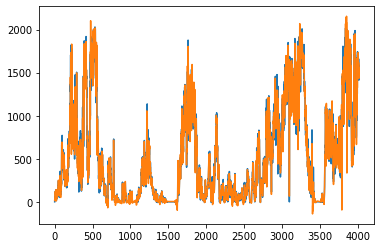

In [13]:

start_time = time.time()


for col in ceemdan1:

    datasetss2=pd.DataFrame(ceemdan1[col])
    datasets=datasetss2.values
    train_size = int(len(datasets) * data_partition)
    test_size = len(datasets) - train_size
    train, test = datasets[0:train_size], datasets[train_size:len(datasets)]

    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    X_train=pd.DataFrame(trainX)
    Y_train=pd.DataFrame(trainY)
    X_test=pd.DataFrame(testX)
    Y_test=pd.DataFrame(testY)
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X= sc_X.fit_transform(X_train)
    y= sc_y.fit_transform(Y_train)
    X1= sc_X.fit_transform(X_test)
    y1= sc_y.fit_transform(Y_test)
    y=y.ravel()
    y1=y1.ravel()  

    import numpy

    trainX = numpy.reshape(X, (X.shape[0], X.shape[1],1))
    testX = numpy.reshape(X1, (X1.shape[0], X1.shape[1],1))

    numpy.random.seed(1234)
    import tensorflow as tf
    tf.random.set_seed(1234)

        
    import os 
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
    from keras.models import Sequential
    from keras.layers.core import Dense, Dropout, Activation
    from keras.layers.recurrent import LSTM

    neuron=128
    model = Sequential()
    model.add(LSTM(units = neuron,input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mse',optimizer=optimizer)

    # Fitting the RNN to the Training set
    model.fit(trainX, y, epochs = epoch, batch_size = batch_size,verbose=0)

    # make predictions
    y_pred_train = model.predict(trainX)
    y_pred_test = model.predict(testX)

    # make predictions

    y_pred_test= numpy.array(y_pred_test).ravel()
    y_pred_test=pd.DataFrame(y_pred_test)
    y1=pd.DataFrame(y1)
    y=pd.DataFrame(y)
    y_pred_train= numpy.array(y_pred_train).ravel()
    y_pred_train=pd.DataFrame(y_pred_train)

    y_test= sc_y.inverse_transform (y1)
    y_train= sc_y.inverse_transform (y)

    y_pred_test1= sc_y.inverse_transform (y_pred_test)
    y_pred_train1= sc_y.inverse_transform (y_pred_train)


    pred_test.append(y_pred_test1)
    test_ori.append(y_test)
    pred_train.append(y_pred_train1)
    train_ori.append(y_train)


result_pred_test= pd.DataFrame.from_records(pred_test)
result_pred_train= pd.DataFrame.from_records(pred_train)


a=result_pred_test.sum(axis = 0, skipna = True) 
b=result_pred_train.sum(axis = 0, skipna = True) 

dataframe=pd.DataFrame(dfs)
dataset=dataframe.values

train_size = int(len(dataset) * data_partition)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
X_train=pd.DataFrame(trainX)
Y_train=pd.DataFrame(trainY)
X_test=pd.DataFrame(testX)
Y_test=pd.DataFrame(testY)

sc_X = StandardScaler()
sc_y = StandardScaler() 
X= sc_X.fit_transform(X_train)
y= sc_y.fit_transform(Y_train)
X1= sc_X.fit_transform(X_test)
y1= sc_y.fit_transform(Y_test)
y=y.ravel()
y1=y1.ravel()


trainX = numpy.reshape(X, (X.shape[0], 1, X.shape[1]))
testX = numpy.reshape(X1, (X1.shape[0], 1, X1.shape[1]))

numpy.random.seed(1234)
import tensorflow as tf

y1=pd.DataFrame(y1)
y=pd.DataFrame(y)

y_test= sc_y.inverse_transform (y1)
y_train= sc_y.inverse_transform (y)


a= pd.DataFrame(a)    
y_test= pd.DataFrame(y_test)    

plt.plot(y_test)
plt.plot(a)

#summarize the fit of the model
mape=numpy.mean((numpy.abs(y_test-a))/cap)*100
rmse= sqrt(mean_squared_error(y_test,a))
mae=metrics.mean_absolute_error(y_test,a)
 
print(mape.to_string())
print(rmse)
print(mae)


times=time.time() - start_time
print("--- %s seconds -" % (times))

In [14]:
#####EEMD LSTM

import time

start_time = time.time()

datas=barus1['P_avg']
datas_wind=pd.DataFrame(datas)
dfs=datas
s = dfs.values

from PyEMD import EMD,EEMD,CEEMDAN

emd = EEMD(noise_width=0.02)
emd.noise_seed(12345)
IMFs = emd(s)

full_imf=pd.DataFrame(IMFs)
ceemdan1=full_imf.T

times=time.time() - start_time
print("--- %s seconds -" % (times))

#%% Example script
import numpy as np
import matplotlib.pyplot as plt
import ewtpy
    

pred_test=[]
test_ori=[]
pred_train=[]
train_ori=[]

--- 73.62552237510681 seconds -


0    1.884101
63.98275694147705
38.6368842854692
--- 1070.1880021095276 seconds -


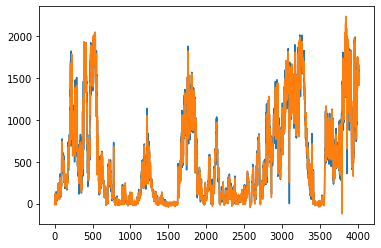

In [15]:

start_time = time.time()


for col in ceemdan1:

    datasetss2=pd.DataFrame(ceemdan1[col])
    datasets=datasetss2.values
    train_size = int(len(datasets) * data_partition)
    test_size = len(datasets) - train_size
    train, test = datasets[0:train_size], datasets[train_size:len(datasets)]

    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    X_train=pd.DataFrame(trainX)
    Y_train=pd.DataFrame(trainY)
    X_test=pd.DataFrame(testX)
    Y_test=pd.DataFrame(testY)
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X= sc_X.fit_transform(X_train)
    y= sc_y.fit_transform(Y_train)
    X1= sc_X.fit_transform(X_test)
    y1= sc_y.fit_transform(Y_test)
    y=y.ravel()
    y1=y1.ravel()  

    import numpy

    trainX = numpy.reshape(X, (X.shape[0], X.shape[1],1))
    testX = numpy.reshape(X1, (X1.shape[0], X1.shape[1],1))

    numpy.random.seed(1234)
    import tensorflow as tf
    tf.random.set_seed(1234)

        
    import os 
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
    from keras.models import Sequential
    from keras.layers.core import Dense, Dropout, Activation
    from keras.layers.recurrent import LSTM

    neuron=128
    model = Sequential()
    model.add(LSTM(units = neuron,input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mse',optimizer=optimizer)

    # Fitting the RNN to the Training set
    model.fit(trainX, y, epochs = epoch, batch_size = batch_size,verbose=0)

    # make predictions
    y_pred_train = model.predict(trainX)
    y_pred_test = model.predict(testX)

    # make predictions

    y_pred_test= numpy.array(y_pred_test).ravel()
    y_pred_test=pd.DataFrame(y_pred_test)
    y1=pd.DataFrame(y1)
    y=pd.DataFrame(y)
    y_pred_train= numpy.array(y_pred_train).ravel()
    y_pred_train=pd.DataFrame(y_pred_train)

    y_test= sc_y.inverse_transform (y1)
    y_train= sc_y.inverse_transform (y)

    y_pred_test1= sc_y.inverse_transform (y_pred_test)
    y_pred_train1= sc_y.inverse_transform (y_pred_train)


    pred_test.append(y_pred_test1)
    test_ori.append(y_test)
    pred_train.append(y_pred_train1)
    train_ori.append(y_train)


result_pred_test= pd.DataFrame.from_records(pred_test)
result_pred_train= pd.DataFrame.from_records(pred_train)


a=result_pred_test.sum(axis = 0, skipna = True) 
b=result_pred_train.sum(axis = 0, skipna = True) 

dataframe=pd.DataFrame(dfs)
dataset=dataframe.values

train_size = int(len(dataset) * data_partition)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
X_train=pd.DataFrame(trainX)
Y_train=pd.DataFrame(trainY)
X_test=pd.DataFrame(testX)
Y_test=pd.DataFrame(testY)

sc_X = StandardScaler()
sc_y = StandardScaler() 
X= sc_X.fit_transform(X_train)
y= sc_y.fit_transform(Y_train)
X1= sc_X.fit_transform(X_test)
y1= sc_y.fit_transform(Y_test)
y=y.ravel()
y1=y1.ravel()


trainX = numpy.reshape(X, (X.shape[0], 1, X.shape[1]))
testX = numpy.reshape(X1, (X1.shape[0], 1, X1.shape[1]))

numpy.random.seed(1234)
import tensorflow as tf

y1=pd.DataFrame(y1)
y=pd.DataFrame(y)

y_test= sc_y.inverse_transform (y1)
y_train= sc_y.inverse_transform (y)


a= pd.DataFrame(a)    
y_test= pd.DataFrame(y_test)    

plt.plot(y_test)
plt.plot(a)

#summarize the fit of the model
mape=numpy.mean((numpy.abs(y_test-a))/cap)*100
rmse= sqrt(mean_squared_error(y_test,a))
mae=metrics.mean_absolute_error(y_test,a)
 
print(mape.to_string())
print(rmse)
print(mae)


times=time.time() - start_time
print("--- %s seconds -" % (times))

In [6]:
##SVR
import time

start_time = time.time()


look_back=6
    
    
datasetss2=pd.DataFrame(s)
datasets=datasetss2.values
    
train_size = int(len(datasets) * data_partition)
test_size = len(datasets) - train_size
train, test = datasets[0:train_size], datasets[train_size:len(datasets)]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
X_train=pd.DataFrame(trainX)
Y_train=pd.DataFrame(trainY)
X_test=pd.DataFrame(testX)
Y_test=pd.DataFrame(testY)
sc_X = StandardScaler()
sc_y = StandardScaler()

X= sc_X.fit_transform(X_train)
y= sc_y.fit_transform(Y_train)
X1= sc_X.fit_transform(X_test)
y1= sc_y.fit_transform(Y_test)
y=y.ravel()
y1=y1.ravel()  
import tensorflow as tf

numpy.random.seed(1234)
tf.random.set_seed(1234)
    
    
from sklearn.svm import SVR 


grid = SVR(kernel='rbf')
grid.fit(X,y)
y_pred_train_svr= grid.predict(X)
y_pred_test_svr= grid.predict(X1)

y_pred_train_svr=pd.DataFrame(y_pred_train_svr)
y_pred_test_svr=pd.DataFrame(y_pred_test_svr)

y1=pd.DataFrame(y1)
y=pd.DataFrame(y)
 
        
y_pred_test1_svr= sc_y.inverse_transform (y_pred_test_svr)
y_pred_train1_svr=sc_y.inverse_transform (y_pred_train_svr)
   
y_test= sc_y.inverse_transform (y1)
y_train= sc_y.inverse_transform (y)
     
y_pred_test1_svr=pd.DataFrame(y_pred_test1_svr)
y_pred_train1_svr=pd.DataFrame(y_pred_train1_svr)
       
y_test= pd.DataFrame(y_test)
  
#summarize the fit of the model
mape=numpy.mean((numpy.abs(y_test-y_pred_test1_svr))/cap)*100
rmse= sqrt(mean_squared_error(y_test,y_pred_test1_svr))
mae=metrics.mean_absolute_error(y_test,y_pred_test1_svr)

    
print(mape.to_string())
print(rmse)
print(mae)

times=time.time() - start_time
print("--- %s seconds -" % (times))


0    4.864697
137.59350570150775
99.75935953908431
--- 0.8986766338348389 seconds -


In [12]:
##RF

start_time = time.time()


look_back=6
    
    
datasetss2=pd.DataFrame(s)
datasets=datasetss2.values
    
train_size = int(len(datasets) * data_partition)
test_size = len(datasets) - train_size
train, test = datasets[0:train_size], datasets[train_size:len(datasets)]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
X_train=pd.DataFrame(trainX)
Y_train=pd.DataFrame(trainY)
X_test=pd.DataFrame(testX)
Y_test=pd.DataFrame(testY)
sc_X = StandardScaler()
sc_y = StandardScaler()

X= sc_X.fit_transform(X_train)
y= sc_y.fit_transform(Y_train)
X1= sc_X.fit_transform(X_test)
y1= sc_y.fit_transform(Y_test)
y=y.ravel()
y1=y1.ravel()  
import tensorflow as tf

numpy.random.seed(1234)
tf.random.set_seed(1234)
    
from sklearn.ensemble import RandomForestRegressor
    

grid = RandomForestRegressor()
grid.fit(X,y)
 

y_pred_train_svr= grid.predict(X)
y_pred_test_svr= grid.predict(X1)

y_pred_train_svr=pd.DataFrame(y_pred_train_svr)
y_pred_test_svr=pd.DataFrame(y_pred_test_svr)

y1=pd.DataFrame(y1)
y=pd.DataFrame(y)
 
        
y_pred_test1_svr= sc_y.inverse_transform (y_pred_test_svr)
y_pred_train1_svr=sc_y.inverse_transform (y_pred_train_svr)
   
y_test= sc_y.inverse_transform (y1)
y_train= sc_y.inverse_transform (y)
     
y_pred_test1_svr=pd.DataFrame(y_pred_test1_svr)
y_pred_train1_svr=pd.DataFrame(y_pred_train1_svr)
       
y_test= pd.DataFrame(y_test)
  
#summarize the fit of the model
mape=numpy.mean((numpy.abs(y_test-y_pred_test1_svr))/cap)*100
rmse= sqrt(mean_squared_error(y_test,y_pred_test1_svr))
mae=metrics.mean_absolute_error(y_test,y_pred_test1_svr)

    
print(mape.to_string())
print(rmse)
print(mae)

times=time.time() - start_time
print("--- %s seconds -" % (times))


0    4.736453
140.36085835492244
97.12949824261777
--- 4.41895055770874 seconds -


In [7]:
##LSTM

start_time = time.time()


look_back=6
    
    
datasetss2=pd.DataFrame(s)
datasets=datasetss2.values
    
train_size = int(len(datasets) * data_partition)
test_size = len(datasets) - train_size
train, test = datasets[0:train_size], datasets[train_size:len(datasets)]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
X_train=pd.DataFrame(trainX)
Y_train=pd.DataFrame(trainY)
X_test=pd.DataFrame(testX)
Y_test=pd.DataFrame(testY)
sc_X = StandardScaler()
sc_y = StandardScaler()

X= sc_X.fit_transform(X_train)
y= sc_y.fit_transform(Y_train)
X1= sc_X.fit_transform(X_test)
y1= sc_y.fit_transform(Y_test)
y=y.ravel()
y1=y1.ravel()  

import tensorflow as tf
numpy.random.seed(1234)
tf.random.set_seed(1234)

import numpy

trainX1 = numpy.reshape(X, (X.shape[0], X.shape[1],1))
testX1 = numpy.reshape(X1, (X1.shape[0], X1.shape[1],1))
    
    
numpy.random.seed(1234)
import tensorflow as tf
tf.random.set_seed(1234)
    
    
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM


neuron=128
model = Sequential()
model.add(LSTM(units = neuron,input_shape=(trainX1.shape[1], trainX1.shape[2])))
model.add(Dense(1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse',optimizer=optimizer)


# Fitting the RNN to the Training s
model.fit(trainX1, y, epochs = 100, batch_size = 64,verbose=0)
  # make predictions
y_pred_train = model.predict(trainX1)
y_pred_test = model.predict(testX1)
y_pred_test= numpy.array(y_pred_test).ravel()

y_pred_test=pd.DataFrame(y_pred_test)
y_pred_test1= sc_y.inverse_transform (y_pred_test)
y1=pd.DataFrame(y1)
      
y_test= sc_y.inverse_transform (y1)
       
#summarize the fit of the model
mape=numpy.mean((numpy.abs(y_test-y_pred_test1))/cap)*100
rmse= sqrt(mean_squared_error(y_test,y_pred_test1))
mae=metrics.mean_absolute_error(y_test,y_pred_test1)

    
print(mape)
print(rmse)
print(mae)

times=time.time() - start_time
print("--- %s seconds -" % (times))


3.949942223154594
129.87460343253503
81.00067123184441
--- 60.745771408081055 seconds -


In [10]:
##ANN

start_time = time.time()


look_back=6
    
    
datasetss2=pd.DataFrame(s)
datasets=datasetss2.values
    
train_size = int(len(datasets) * data_partition)
test_size = len(datasets) - train_size
train, test = datasets[0:train_size], datasets[train_size:len(datasets)]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
X_train=pd.DataFrame(trainX)
Y_train=pd.DataFrame(trainY)
X_test=pd.DataFrame(testX)
Y_test=pd.DataFrame(testY)
sc_X = StandardScaler()
sc_y = StandardScaler()

X= sc_X.fit_transform(X_train)
y= sc_y.fit_transform(Y_train)
X1= sc_X.fit_transform(X_test)
y1= sc_y.fit_transform(Y_test)
y=y.ravel()
y1=y1.ravel()  

import tensorflow as tf
numpy.random.seed(1234)
tf.random.set_seed(1234)

import numpy

trainX1 = numpy.reshape(X, (X.shape[0],1,X.shape[1]))
testX1 = numpy.reshape(X1, (X1.shape[0],1,X1.shape[1]))
    
    
numpy.random.seed(1234)
import tensorflow as tf
tf.random.set_seed(1234)
    
    
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM


neuron=128
model = Sequential()
model.add(Dense(units = neuron,input_shape=(trainX1.shape[1], trainX1.shape[2])))
model.add(Dense(1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse',optimizer=optimizer)


# Fitting the RNN to the Training s
model.fit(trainX1, y,verbose=0)
  # make predictions
y_pred_train = model.predict(trainX1)
y_pred_test = model.predict(testX1)
y_pred_test= numpy.array(y_pred_test).ravel()

y_pred_test=pd.DataFrame(y_pred_test)
y_pred_test1= sc_y.inverse_transform (y_pred_test)
y1=pd.DataFrame(y1)
      
y_test= sc_y.inverse_transform (y1)
       
#summarize the fit of the model
mape=numpy.mean((numpy.abs(y_test-y_pred_test1))/cap)*100
rmse= sqrt(mean_squared_error(y_test,y_pred_test1))
mae=metrics.mean_absolute_error(y_test,y_pred_test1)

    
print(mape)
print(rmse)
print(mae)

times=time.time() - start_time
print("--- %s seconds -" % (times))


4.055859245437509
134.50685647815283
83.17269031847867
--- 0.765383243560791 seconds -
